In [49]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42  # no type-3
matplotlib.rcParams['ps.fonttype'] = 42

# Collecting the results of the experiments

## Functions

In [15]:
def recursive_results(path,dirlist,str_, res_):
    """ 
    A recursive search for the results - it's like a sniffing dog really.
    """
    if "res_summary.csv" in dirlist:
        res = pd.read_csv(os.path.join(path,"res_summary.csv"))
        return [res], str_
    else:
        r_tmp = res_.copy()
        s_tmp = []
        for d in dirlist:
            path_ = os.path.join(path,d)
            r_, s_ = recursive_results(path_, os.listdir(path_), [str_[0] + "-*-" + d],res_)
            r_tmp = r_tmp + r_
            s_tmp = s_tmp + s_
        return r_tmp, s_tmp
    
def get_time_series(df,signal):
    ts = []
    for stage in ['Low','Mid-low','Mid-high','High']:
        df_ = df[stage].copy()
        ts.append(df_.loc[df_.Signal==signal]["p-value"].item())
    return ts

## Tables

making automatic latex tables. Not pretty but efficient. American style.

In [16]:
dir_path = os.path.join("results", "ihdp")
setups = ["samePOihdp_GC","samePOihdp-highhc_GC","samePOihdp-lowhc_GC","diffPOihdp-highdiff_GC","diffPOihdp-lowdiff_GC"]

setups_names_dict = {"samePOihdp_GC": "Same PO, GC",
                     "samePOihdp-highhc_GC": "Same PO, GC, high HC",
                     "samePOihdp-lowhc_GC": "Same PO, GC, low HC",
                     "diffPOihdp-highdiff_GC": "Diff PO, GC, high diff",
                     "diffPOihdp-lowdiff_GC": "Diff PO, GC, low diff"}

### Collecting results and aggregating in a big fat ass DF

In [17]:
M = "3"

In [18]:
df_list = []
for setup in setups:
    dir_ = os.path.join(dir_path, setup)
    dirlist = os.listdir(dir_)
    r_list, s_list = recursive_results(dir_,dirlist,[""],[]) 

    assert len(r_list) == len(s_list)

    df_list_ = []
    for i in range(len(r_list)):
        p_val = r_list[i].iloc[0][1].item()
        config = s_list[i].split("-*-")[1:]
        config_dict = {"Signal":config[0].split("'")[1].replace("_","-"), "M": config[1].split('[')[1].split(']')[0] ,"CD":config[2], "UC":config[3], "p-value":p_val}
        df_list_.append(pd.DataFrame(config_dict, index = [i]))
    df_ = pd.concat(df_list_)
    df_.sort_values(by = ["Signal","M","CD","UC"], inplace = True)
    #df_["setup"] = setup
    df_list.append(df_.loc[df_.M==M])
df = pd.concat(df_list, axis = 1, keys = [setups_names_dict[setup] for setup in setups])

/tmp/ipykernel_3025682/126393597.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = r_list[i].iloc[0][1].item()
/tmp/ipykernel_3025682/126393597.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = r_list[i].iloc[0][1].item()
/tmp/ipykernel_3025682/126393597.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = r_list[i].iloc[0][1].item()
/tmp/ipykernel_3025682/126393597.py:11: FutureWarning: Series.__getite

In [19]:
print(df.to_latex(escape = False,index = False))

\begin{tabular}{llllrllllrllllrllllrllllr}
\toprule
\multicolumn{5}{r}{Same PO, GC} & \multicolumn{5}{r}{Same PO, GC, high HC} & \multicolumn{5}{r}{Same PO, GC, low HC} & \multicolumn{5}{r}{Diff PO, GC, high diff} & \multicolumn{5}{r}{Diff PO, GC, low diff} \\
Signal & M & CD & UC & p-value & Signal & M & CD & UC & p-value & Signal & M & CD & UC & p-value & Signal & M & CD & UC & p-value & Signal & M & CD & UC & p-value \\
\midrule
CDR & 3 & CD-10 & UC-0 & 0.725000 & CDR & 3 & CD-10 & UC-1 & 0.825000 & CDR & 3 & CD-10 & UC-1 & 0.700000 & CDR & 3 & CD-10 & UC-0 & 1.000000 & CDR & 3 & CD-10 & UC-0 & 0.300000 \\
DR-Drop & 3 & CD-10 & UC-0 & 0.075000 & DR-Drop & 3 & CD-10 & UC-1 & 1.000000 & DR-Drop & 3 & CD-10 & UC-1 & 0.650000 & DR-Drop & 3 & CD-10 & UC-0 & 1.000000 & DR-Drop & 3 & CD-10 & UC-0 & 0.425000 \\
DR-Impute & 3 & CD-10 & UC-0 & 0.050000 & DR-Impute & 3 & CD-10 & UC-1 & 1.000000 & DR-Impute & 3 & CD-10 & UC-1 & 0.550000 & DR-Impute & 3 & CD-10 & UC-0 & 1.000000 & DR-Impute & 3 

## Figures

### Diff

In [101]:
M = "3"
ts = {}

In [104]:
ts['diff'] = {}

dir_path = os.path.join("results", "ihdp")
setups = ["diffPOihdp-lowdiff","diffPOihdp-midlowdiff","diffPOihdp-midhighdiff","diffPOihdp-highdiff"]
#setups = ["diffPOihdp-midlowdiff","diffPOihdp-midhighdiff"]

setups_names_dict = {"diffPOihdp-lowdiff": "Low",
                        "diffPOihdp-midlowdiff": "Mid-low",
                        "diffPOihdp-midhighdiff": "Mid-high",
                        "diffPOihdp-highdiff": "High"}

df_list = []
for setup in setups:
    dir_ = os.path.join(dir_path, setup)
    dirlist = os.listdir(dir_)
    r_list, s_list = recursive_results(dir_,dirlist,[""],[]) 

    assert len(r_list) == len(s_list)

    df_list_ = []
    for i in range(len(r_list)):
        p_val = r_list[i].iloc[0][1].item()
        config = s_list[i].split("-*-")[1:]
        config_dict = {"Signal":config[0].split("'")[1].replace("_","-"), "M": config[1].split('[')[1].split(']')[0] ,"CD":config[2], "UC":config[3], "p-value":p_val}
        df_list_.append(pd.DataFrame(config_dict, index = [i]))
    df_ = pd.concat(df_list_)
    df_.sort_values(by = ["Signal","M","CD","UC"], inplace = True)
    #df_["setup"] = setup
    df_list.append(df_.loc[df_.M==M])
df = pd.concat(df_list, axis = 1, keys = [setups_names_dict[setup] for setup in setups])

for i,signal in enumerate(["IPCW", "CDR", "DR-Drop","DR-Impute","IPW-Drop","IPW-Impute"]):
    ts['diff'][signal] = get_time_series(df,signal)
                                         
  
ts['conf'] = {}
dir_path = os.path.join("results", "ihdp")
setups = ["samePOihdp-lowhc","samePOihdp-midlowhc", "samePOihdp-midhighhc", "samePOihdp-highhc"]

setups_names_dict = {"samePOihdp-lowhc": "Low",
                        "samePOihdp-midlowhc": "Mid-low",
                        "samePOihdp-midhighhc": "Mid-high",
                        "samePOihdp-highhc": "High"}


df_list = []
for setup in setups:
    dir_ = os.path.join(dir_path, setup)
    dirlist = os.listdir(dir_)
    r_list, s_list = recursive_results(dir_,dirlist,[""],[]) 

    assert len(r_list) == len(s_list)

    df_list_ = []
    for i in range(len(r_list)):
        p_val = r_list[i].iloc[0][1].item()
        config = s_list[i].split("-*-")[1:]
        config_dict = {"Signal":config[0].split("'")[1].replace("_","-"), "M": config[1].split('[')[1].split(']')[0] ,"CD":config[2], "UC":config[3], "p-value":p_val}
        df_list_.append(pd.DataFrame(config_dict, index = [i]))
    df_ = pd.concat(df_list_)
    df_.sort_values(by = ["Signal","M","CD","UC"], inplace = True)
    #df_["setup"] = setup
    df_list.append(df_.loc[df_.M==M])
df = pd.concat(df_list, axis = 1, keys = [setups_names_dict[setup] for setup in setups])
                                         
for i,signal in enumerate(["IPCW", "CDR", "DR-Drop","DR-Impute","IPW-Drop","IPW-Impute"]):
    ts['conf'][signal] = get_time_series(df,signal)
    
    
ts['conf_GC'] = {}
dir_path = os.path.join("results", "ihdp")
setups = ["samePOihdp-lowhc","samePOihdp-midlowhc", "samePOihdp-midhighhc", "samePOihdp-highhc"]

setups_names_dict = {"samePOihdp-lowhc": "Low",
                        "samePOihdp-midlowhc": "Mid-low",
                        "samePOihdp-midhighhc": "Mid-high",
                        "samePOihdp-highhc": "High"}


df_list = []
for setup in setups:
    dir_ = os.path.join(dir_path, setup)
    dirlist = os.listdir(dir_)
    r_list, s_list = recursive_results(dir_,dirlist,[""],[]) 

    assert len(r_list) == len(s_list)

    df_list_ = []
    for i in range(len(r_list)):
        p_val = r_list[i].iloc[0][1].item()
        config = s_list[i].split("-*-")[1:]
        config_dict = {"Signal":config[0].split("'")[1].replace("_","-"), "M": config[1].split('[')[1].split(']')[0] ,"CD":config[2], "UC":config[3], "p-value":p_val}
        df_list_.append(pd.DataFrame(config_dict, index = [i]))
    df_ = pd.concat(df_list_)
    df_.sort_values(by = ["Signal","M","CD","UC"], inplace = True)
    #df_["setup"] = setup
    df_list.append(df_.loc[df_.M==M])
df = pd.concat(df_list, axis = 1, keys = [setups_names_dict[setup] for setup in setups])
                                         
for i,signal in enumerate(["IPCW", "CDR", "DR-Drop","DR-Impute","IPW-Drop","IPW-Impute"]):
    ts['conf'][signal] = get_time_series(df,signal)

/tmp/ipykernel_3025682/2797717742.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = r_list[i].iloc[0][1].item()
/tmp/ipykernel_3025682/2797717742.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = r_list[i].iloc[0][1].item()
/tmp/ipykernel_3025682/2797717742.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = r_list[i].iloc[0][1].item()
/tmp/ipykernel_3025682/2797717742.py:22: FutureWarning: Series.__ge

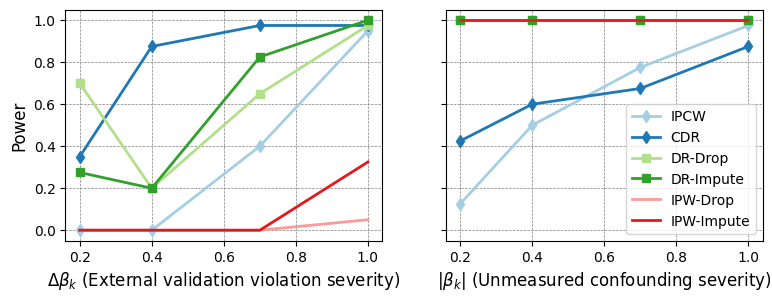

In [138]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(9, 3))

for i,signal in enumerate(["IPCW", "CDR", "DR-Drop","DR-Impute","IPW-Drop","IPW-Impute"]):    
    ax2.plot(xs, ts['conf'][signal],label = signal, linewidth = 2, marker=marker[i], color=palette[i])
    ax1.plot(xs, ts['diff'][signal],label = signal, linewidth = 2, marker=marker[i], color=palette[i])

ax1.grid(color='gray', linestyle='--', linewidth=0.5)
ax2.grid(color='gray', linestyle='--', linewidth=0.5)

ax2.legend()
ax1.set_ylabel("Power", fontsize = 12)

ax2.set_xlabel(r"$| \beta_k |$ (Unmeasured confounding severity)", fontsize = 12)
ax1.set_xlabel(r"$\Delta \beta_k$ (External validation violation severity)", fontsize = 12)
plt.savefig('./results/figures/CIC-Sweep.pdf', bbox_inches='tight')
plt.show()

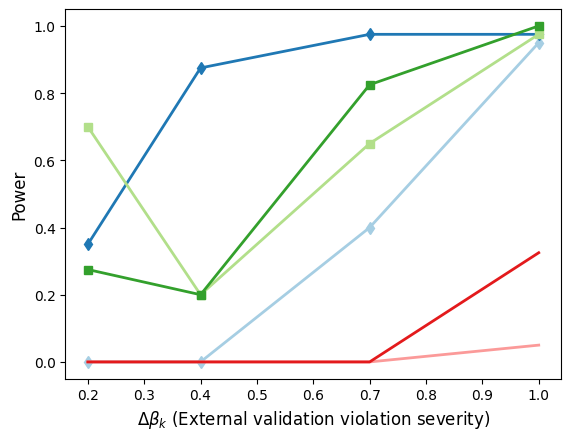

In [108]:
xs = [0.2,0.4,0.7,1.0]
palette = sns.color_palette("Paired", 6)
marker = ['d', 'd', 's', 's', '', '']

plt.figure()
for i,signal in enumerate(["IPCW", "CDR", "DR-Drop","DR-Impute","IPW-Drop","IPW-Impute"]):
    ys = ts['diff'][signal]
    plt.plot(xs, ys,label = signal, linewidth = 2, marker=marker[i], color=palette[i])
#plt.legend(fontsize = 15,loc = "lower right",bbox_to_anchor=(1.45, 0.0))
#plt.legend(fontsize = 10)
plt.ylabel("Power", fontsize = 12)
plt.xlabel(r"$\Delta \beta_k$ (External validation violation severity)", fontsize = 12)
plt.show()

In [95]:
get_time_series(df,"CDR")

[0.35, 0.875, 0.975, 0.975]

<Figure size 640x480 with 0 Axes>

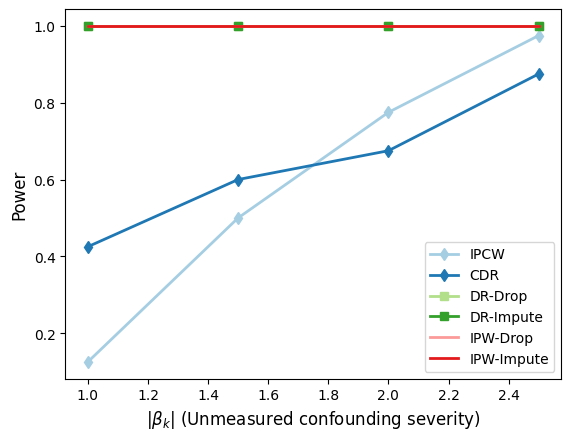

In [107]:
xs = [1,1.5,2,2.5]
palette = sns.color_palette("Paired", 6)
marker = ['d', 'd', 's', 's', '', '']

plt.figure()
cnt = 1
plt.figure()
for i,signal in enumerate(["IPCW", "CDR", "DR-Drop","DR-Impute","IPW-Drop","IPW-Impute"]):
    ys = ts['conf'][signal]
    plt.plot(xs, ys,label = signal, linewidth = 2, marker=marker[i], color=palette[i])
#plt.legend(fontsize = 15,loc = "lower right",bbox_to_anchor=(1.45, 0.0))
plt.legend(fontsize = 10)
plt.ylabel("Power", fontsize = 12)
plt.xlabel(r"$| \beta_k |$ (Unmeasured confounding severity)", fontsize = 12)
plt.show()

### Hidden confounders

In [96]:
dir_path = os.path.join("results", "ihdp")
setups = ["samePOihdp-lowhc","samePOihdp-midlowhc", "samePOihdp-midhighhc", "samePOihdp-highhc"]

setups_names_dict = {"samePOihdp-lowhc": "Low",
                        "samePOihdp-midlowhc": "Mid-low",
                        "samePOihdp-midhighhc": "Mid-high",
                        "samePOihdp-highhc": "High"}


df_list = []
for setup in setups:
    dir_ = os.path.join(dir_path, setup)
    dirlist = os.listdir(dir_)
    r_list, s_list = recursive_results(dir_,dirlist,[""],[]) 

    assert len(r_list) == len(s_list)

    df_list_ = []
    for i in range(len(r_list)):
        p_val = r_list[i].iloc[0][1].item()
        config = s_list[i].split("-*-")[1:]
        config_dict = {"Signal":config[0].split("'")[1].replace("_","-"), "M": config[1].split('[')[1].split(']')[0] ,"CD":config[2], "UC":config[3], "p-value":p_val}
        df_list_.append(pd.DataFrame(config_dict, index = [i]))
    df_ = pd.concat(df_list_)
    df_.sort_values(by = ["Signal","M","CD","UC"], inplace = True)
    #df_["setup"] = setup
    df_list.append(df_.loc[df_.M==M])
df = pd.concat(df_list, axis = 1, keys = [setups_names_dict[setup] for setup in setups])

/tmp/ipykernel_3025682/126393597.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = r_list[i].iloc[0][1].item()
/tmp/ipykernel_3025682/126393597.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = r_list[i].iloc[0][1].item()
/tmp/ipykernel_3025682/126393597.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = r_list[i].iloc[0][1].item()
/tmp/ipykernel_3025682/126393597.py:11: FutureWarning: Series.__getite